Here I am visualizing the results of training and testing on Alibaba dataset

In [5]:
import pandas as pd
import time
import platform
import sys
import zipfile
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

seed = 1234

In [6]:

# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = "Testing Traces/topology_testing_traces.zip"
extract_dir = "Testing Traces/topology_testing_traces"

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [7]:
topology_df = pd.read_csv("Testing Traces/topology_testing_traces/topology_testing_traces/mean_trace_test_max.csv")
topology_df

,metric,common_neighbours,sorensen_index,salton_index,jaccard_index,resource_allocation,adamic_adar,katz_index,lhn_index
0,mrr,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059
1,hits_at_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hits_at_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,hits_at_5,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211
4,hits_at_10,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712


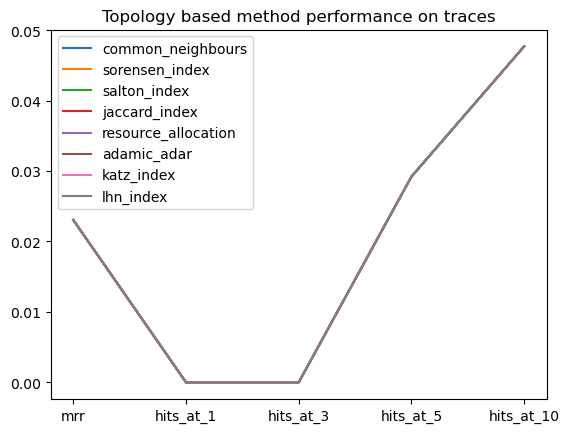

In [14]:
topology_df.plot()
x_values = topology_df['metric']
plt.xticks(np.arange(0,5), x_values)
plt.title("Topology based method performance on traces")
plt.show()

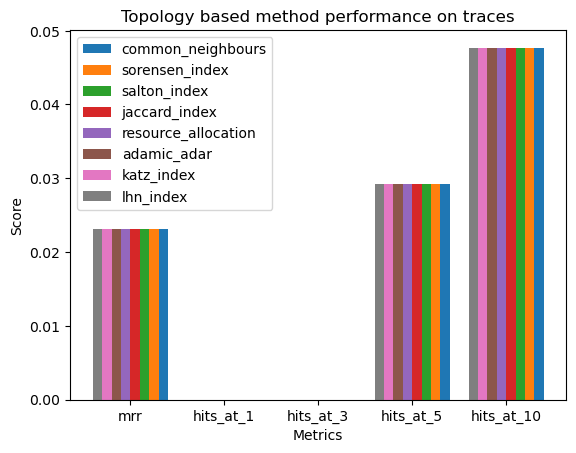

In [95]:
X_axis = np.arange(len(topology_df))+0.35
metrics = list(topology_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology based method performance on traces")
plt.legend()
plt.show()

In [11]:
topology_connected_df = pd.read_csv("Testing Traces/topology_connected_testing_traces/mean_trace_test_max.csv")
topology_connected_df

,metric,common_neighbours,sorensen_index,salton_index,jaccard_index,resource_allocation,adamic_adar,katz_index,lhn_index
0,mrr,0.037942,0.038857,0.038862,0.039355,0.143154,0.143153,0.137328,0.041754
1,hits_at_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hits_at_3,0.034091,0.034091,0.034091,0.034091,0.128166,0.128166,0.115694,0.034091
3,hits_at_5,0.054545,0.054545,0.054545,0.056818,0.248808,0.248808,0.175986,0.056818
4,hits_at_10,0.067045,0.069318,0.069318,0.073864,0.325675,0.325675,0.273479,0.075000


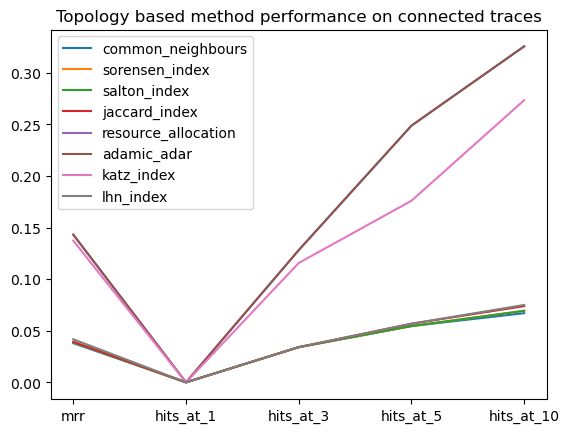

In [4]:
topology_connected_df.plot()
x_values = topology_connected_df['metric']
plt.xticks(np.arange(0,5), x_values)
plt.title("Topology based method performance on connected traces")
plt.show()

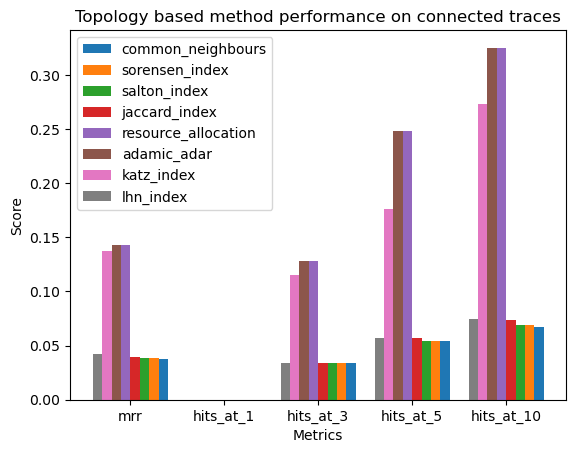

In [94]:
X_axis = np.arange(len(topology_connected_df))+0.35
metrics = list(topology_connected_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_connected_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_connected_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology based method performance on connected traces")
plt.legend()
plt.show()

In [48]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive']

In [49]:
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'Testing Traces/{model_name}_testing_traces.zip'
    extract_dir =f'Testing Traces/{model_name}_testing_traces'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)


In [50]:
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['optimistic','realistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','pessimistic':model_name}))

In [51]:
traces_testing_df_list[0]

,metric,convE_transductive
0,inverse_harmonic_mean_rank,0.568130
1,hits_at_1,0.379935
2,hits_at_3,0.682953
3,hits_at_5,0.796821
4,hits_at_10,0.948251


In [52]:
traces_testing_df = traces_testing_df_list[0]
for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')

In [53]:
traces_testing_df

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive
0,inverse_harmonic_mean_rank,0.568130,0.618457,0.758552,0.467251,0.765415,0.300213
1,hits_at_1,0.379935,0.419083,0.588092,0.257203,0.646847,0.137133
2,hits_at_3,0.682953,0.774699,0.924481,0.623348,0.873487,0.345912
3,hits_at_5,0.796821,0.894633,0.965060,0.739477,0.939147,0.505604
4,hits_at_10,0.948251,0.980055,0.989355,0.874131,0.970239,0.641593


C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\773015255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


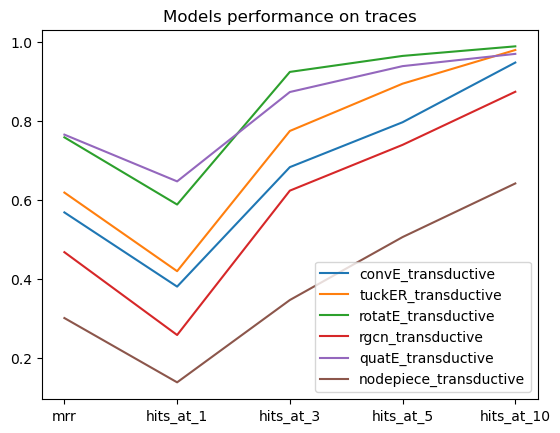

In [54]:
traces_testing_df.plot()
x_values = traces_testing_df['metric']
x_values[0] = 'mrr'
plt.xticks(np.arange(0,5), x_values)
plt.title("Models performance on traces")
plt.show()

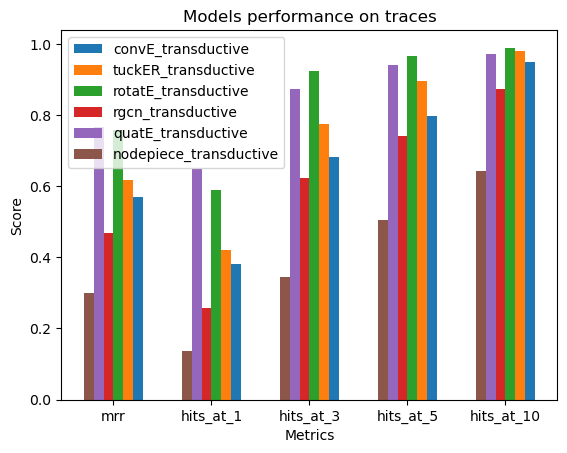

In [91]:
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Models performance on traces")
plt.legend()
plt.show()

In [96]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive','nodepiece_inductive']
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'{model_name}.zip'
    extract_dir =f'{model_name}'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [101]:
def plot_test(pred_type,policy):
    policies = ['optimistic', 'realistic','pessimistic']
    policies.remove(policy)
    testing_df_list = []
    for model_name in model_name_list:
        testing_df_list.append(pd.read_csv(f'{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
                                     .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
        testing_df = testing_df_list[0]
    for i in range(1, len(testing_df_list)):
        testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')
#     testing_df.plot()
#     x_values = testing_df['metric']
#     x_values[0] = 'mrr'
#     plt.xticks(np.arange(0,5), x_values)
#     plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
#     plt.show()
    
    
    models = list(testing_df)[1:]
    X_axis = np.arange(len(testing_df)) +0.25
    for i in range(len(models)):
        plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

    x_values = testing_df['metric']
    x_values[0] = 'mrr'

    plt.xticks(np.arange(0,len(x_values)), x_values)
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
    plt.legend()

    plt.show()

C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\2532132264.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


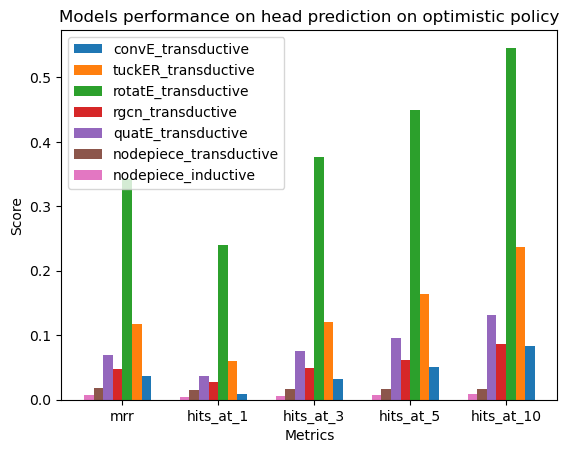

C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\2532132264.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


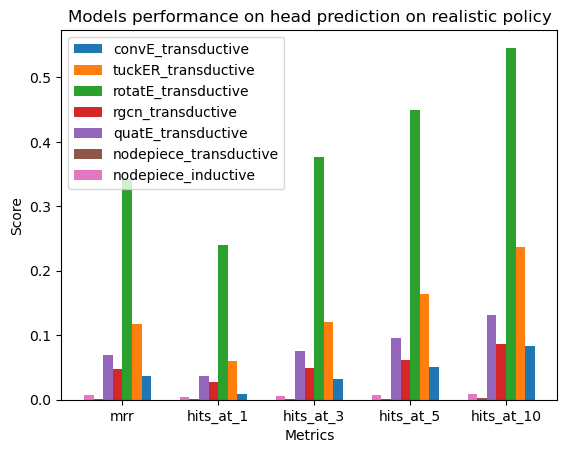

C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\2532132264.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


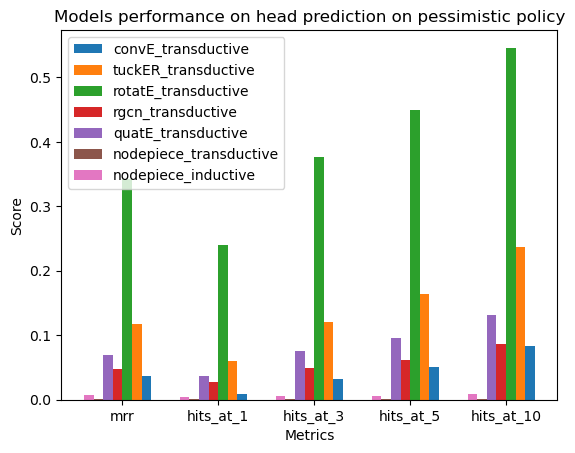

C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\2532132264.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


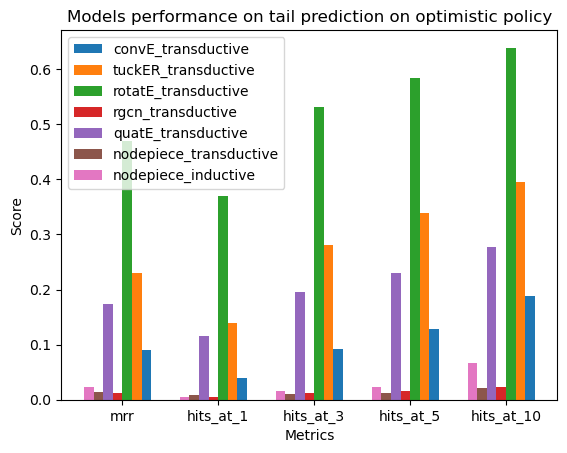

C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\2532132264.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


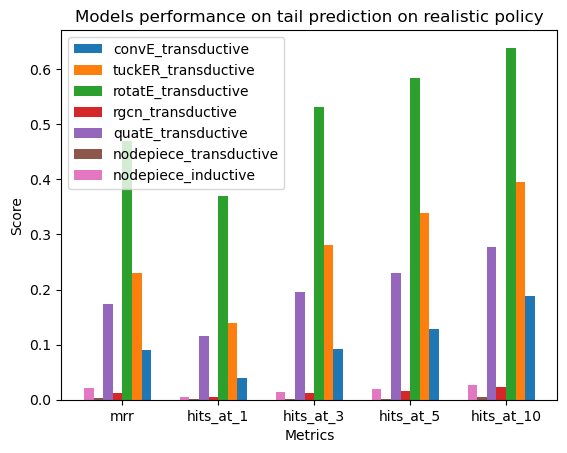

C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\2532132264.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


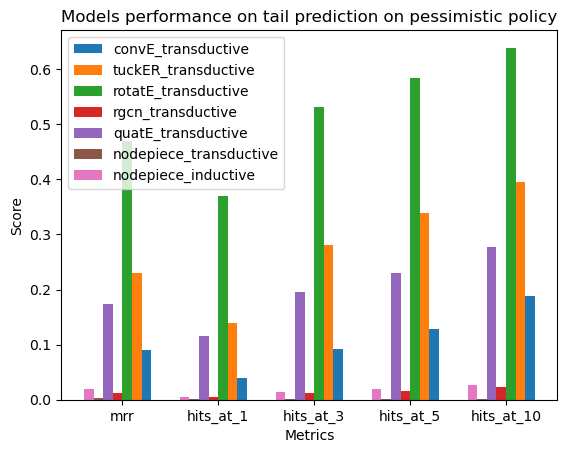

C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\2532132264.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


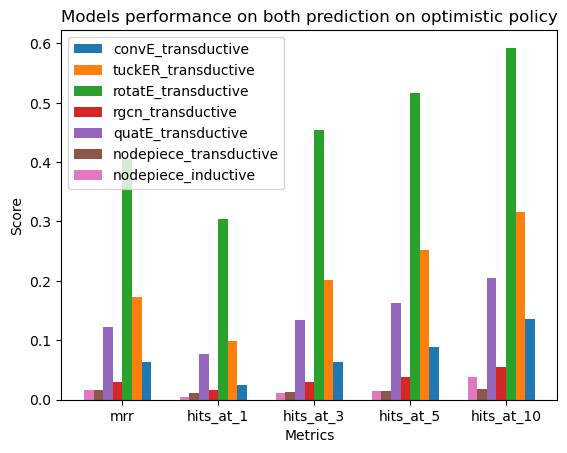

C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\2532132264.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


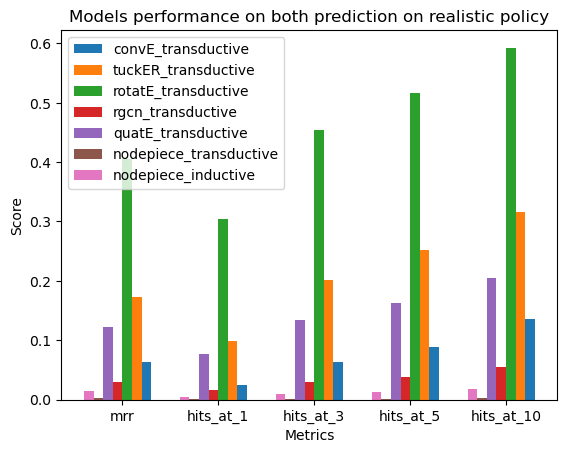

C:\Users\gianl\AppData\Local\Temp\ipykernel_4692\2532132264.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


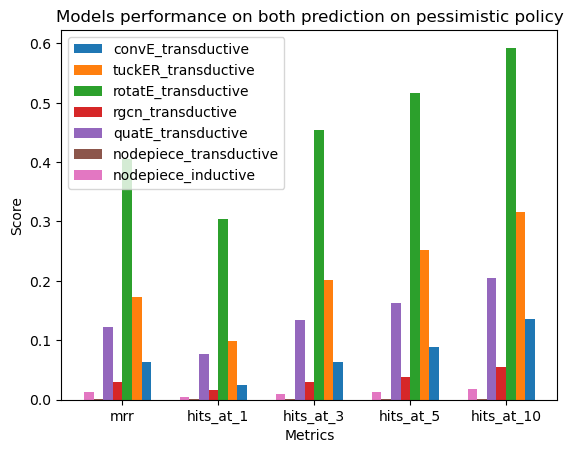

In [102]:
for pred_type in ['head','tail','both']:
    for policy in ['optimistic', 'realistic','pessimistic']:
        plot_test(pred_type,policy)

In [310]:
def plot_information(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
        information_df = information_df_list[0]
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.bar(names,list(information_df[information]))
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Models {information}')
    plt.show()
    

,parameters bytes
convE_transductive,21700172.0
tuckER_transductive,45333600.0
rotatE_transductive,26660800.0
rgcn_transductive,15572288.0
quatE_transductive,53321600.0
nodepiece_transductive,10400.0
nodepiece_inductive,10400.0


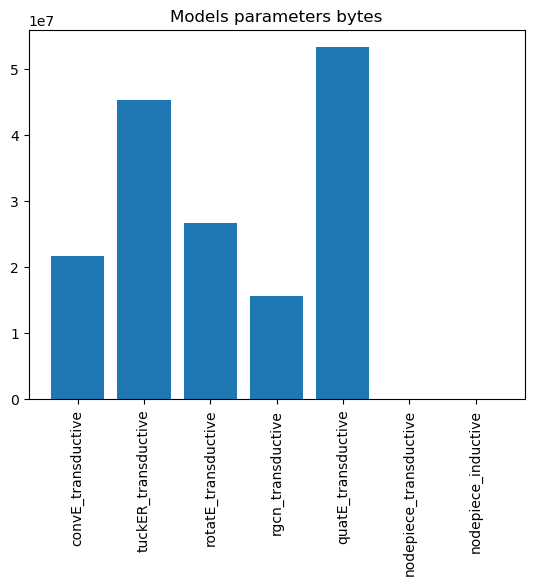

,number parameters
convE_transductive,5425043.0
tuckER_transductive,11333400.0
rotatE_transductive,6665200.0
rgcn_transductive,3893072.0
quatE_transductive,13330400.0
nodepiece_transductive,2600.0
nodepiece_inductive,2600.0


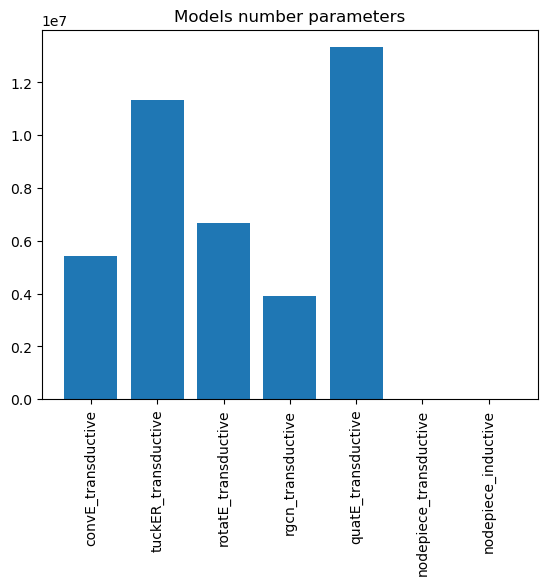

,training duration
convE_transductive,152.307357
tuckER_transductive,2184.641061
rotatE_transductive,1083.521330
rgcn_transductive,162.562170
quatE_transductive,5897.180882
nodepiece_transductive,380.490565
nodepiece_inductive,27.223185


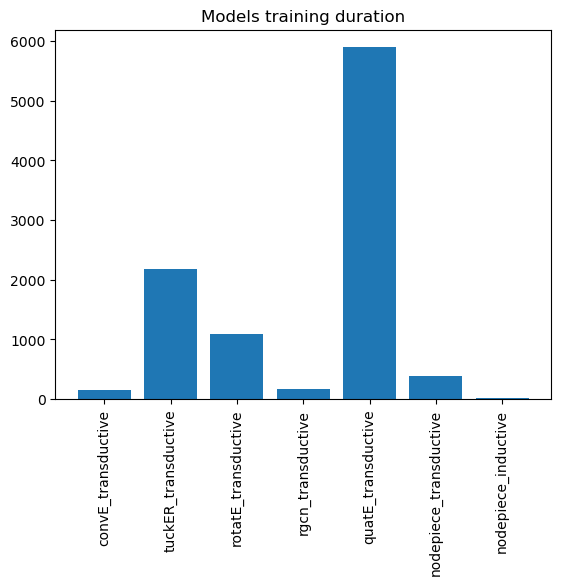

,training evaluation duration
convE_transductive,8.850411
tuckER_transductive,44.144119
rotatE_transductive,25.961781
rgcn_transductive,15.360800
quatE_transductive,227.655242
nodepiece_transductive,14.325843
nodepiece_inductive,9.132776


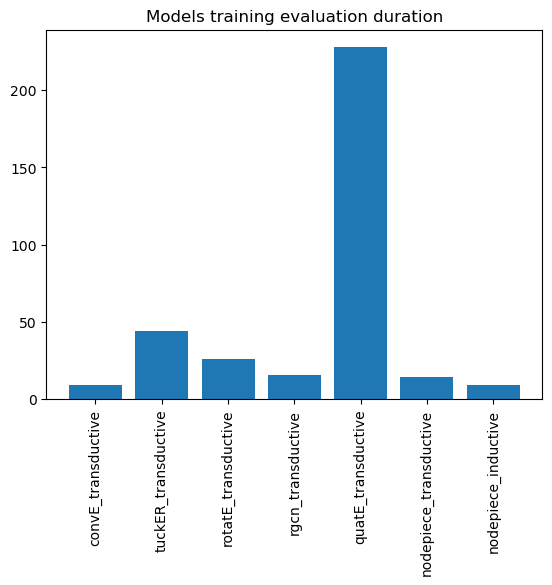

,validation evaluation duration
convE_transductive,3.318937
tuckER_transductive,12.366796
rotatE_transductive,8.262082
rgcn_transductive,6.259169
quatE_transductive,58.021291
nodepiece_transductive,4.986118
nodepiece_inductive,2.887875


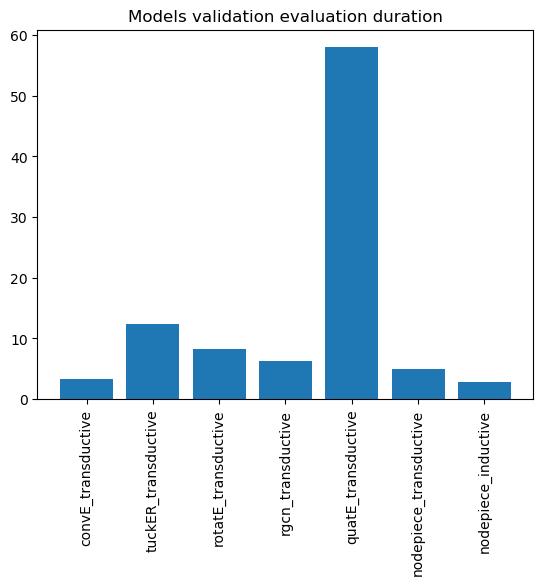

,testing evaluation duration
convE_transductive,3.743608
tuckER_transductive,15.446498
rotatE_transductive,9.931920
rgcn_transductive,6.276913
quatE_transductive,73.281976
nodepiece_transductive,6.067957
nodepiece_inductive,2.862115


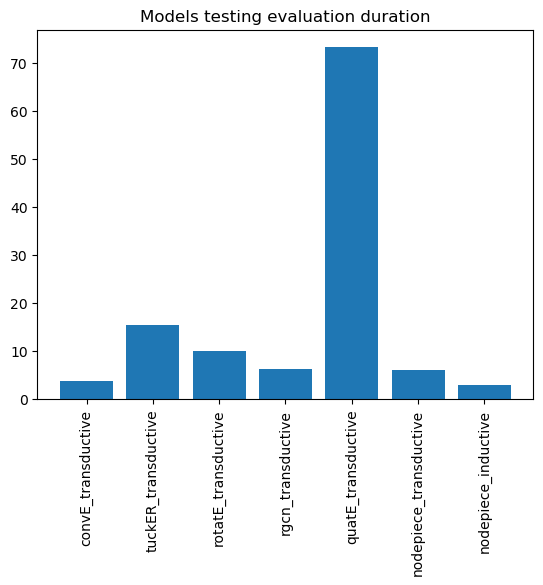

In [314]:
for information in['parameters bytes','number parameters', 'training duration','training evaluation duration',
              'validation evaluation duration','testing evaluation duration']:
    plot_information(information)